# NOTES

1. need team info
2. need height info

In [118]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [119]:
# open nba statistics file

nba_stats = pd.read_csv('nba.csv')
nba_stats = nba_stats.to_numpy()

print(nba_stats)

[[1 1 'Precious Achiuwa' ... 0.3 -1.4 0.2]
 [2 2 'Bam Adebayo' ... 1.7 2.4 2.7]
 [3 3 'Ochai Agbaji' ... -0.9 -4.4 -1.0]
 ...
 [570 570 'Omer Yurtseven' ... -1.5 -3.0 -0.1]
 [571 571 'Cody Zeller' ... 0.3 -2.6 0.0]
 [572 572 'Ivica Zubac' ... 0.0 0.8 1.3]]


In [120]:
# replace missing values with 0

nba_stats = np.where(pd.isna(nba_stats), 0, nba_stats)

print(nba_stats[571,4:])


[26 68 68 26.4 5.0 7.6 0.649 0.0 0.0 0 5.0 7.6 0.649 0.649 1.8 2.4 0.723
 2.9 6.3 9.2 1.4 0.3 1.2 1.2 2.6 11.7 19.3 0.671 0.0 0.32 12.8 26.2 19.7
 7.5 0.6 4.2 11.8 16.4 4.5 2.3 6.8 0.182 0.8 0.0 0.8 1.3]


In [121]:
# encode the position column
label_encoder = LabelEncoder()
encoded_data = label_encoder.fit_transform(nba_stats[:,3])

nba_stats[:,3] = encoded_data

print(nba_stats[:,:5])

[[1 1 'Precious Achiuwa' 1 24]
 [2 2 'Bam Adebayo' 0 26]
 [3 3 'Ochai Agbaji' 4 23]
 ...
 [570 570 'Omer Yurtseven' 0 25]
 [571 571 'Cody Zeller' 0 31]
 [572 572 'Ivica Zubac' 0 26]]


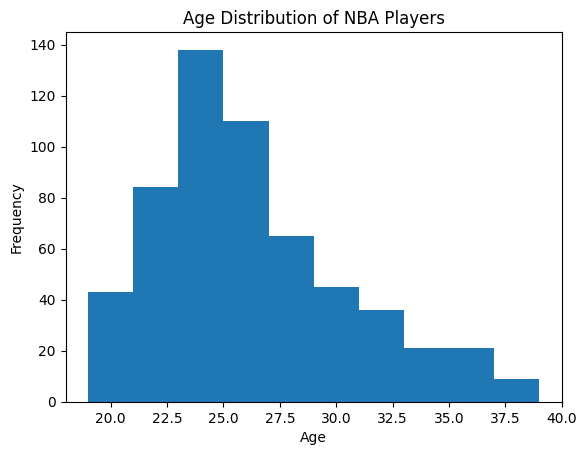

In [122]:
# histogram of the age column

plt.hist(nba_stats[:,4], bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of NBA Players')
plt.show()

# Messing around test graphs

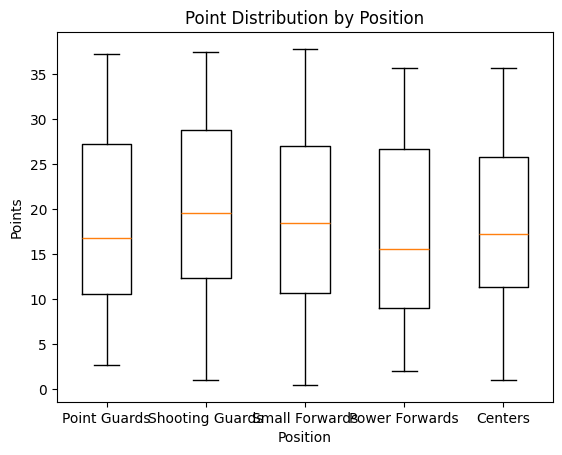

In [124]:
# graph point distributions by position using box plot

plt.boxplot([point_guards[:,7], shooting_guards[:,7], small_forwards[:,7], power_forwards[:,7], centers[:,7]])

plt.xlabel('Position')
plt.ylabel('Points')
plt.title('Point Distribution by Position')
plt.xticks([1, 2, 3, 4, 5], ['Point Guards', 'Shooting Guards', 'Small Forwards', 'Power Forwards', 'Centers'])

plt.show()

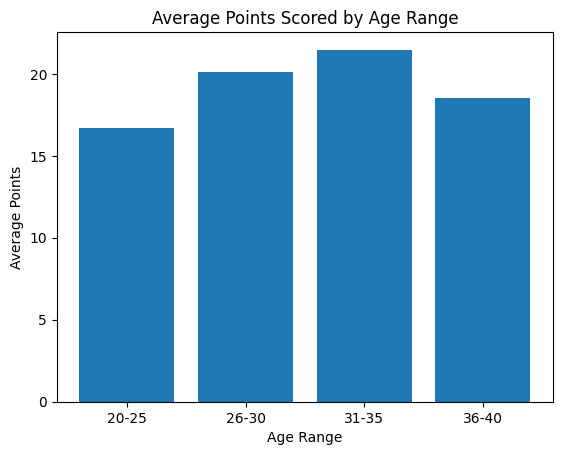

In [125]:
# group the players by age ranges, then compare the average points scored by each group

age_ranges = ['20-25', '26-30', '31-35', '36-40']
age_ranges_points = []

for i in range(20, 40, 5):
    age_range = nba_stats[(nba_stats[:,4] >= i) & (nba_stats[:,4] < i+5)]
    age_ranges_points.append(np.mean(age_range[:,7]))
    
plt.bar(age_ranges, age_ranges_points)

plt.xlabel('Age Range')
plt.ylabel('Average Points')
plt.title('Average Points Scored by Age Range')

plt.show()


In [128]:
# apply PCA to the data

PCA_model = PCA(n_components=10)


PCA_model.fit(nba_stats[:,4:])
PCA_data = PCA_model.transform(nba_stats[:,4:])

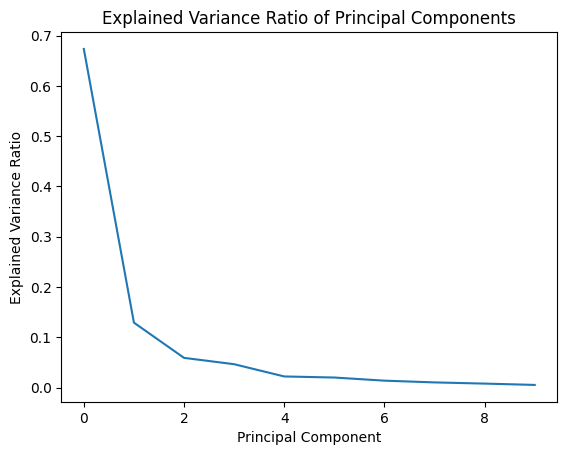

In [129]:
# plot the explained variance ratio

plt.plot(PCA_model.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Principal Components')
plt.show()